In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

In [4]:
train=pd.read_csv('Haker earth carnival wars/train.csv')

In [5]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


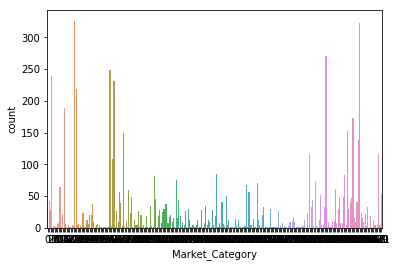

In [6]:
sns.countplot(train['Market_Category'])

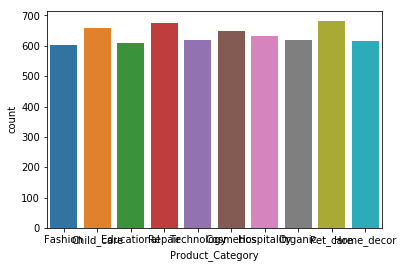

In [8]:
sns.countplot(train['Product_Category'])

In [9]:
train.head(4)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824


In [10]:
train = train.dropna()

In [11]:
train1=train.drop(['Product_id','Stall_no','instock_date','Market_Category','Customer_name','Selling_Price'],axis=1)

In [12]:
train.shape

(5397, 15)

In [13]:
train1.shape

(5397, 9)

In [14]:
train1.isnull().any()

Loyalty_customer    False
Product_Category    False
Grade               False
Demand              False
Discount_avail      False
charges_1           False
charges_2 (%)       False
Minimum_price       False
Maximum_price       False
dtype: bool

In [15]:
np.isfinite(train1.all())

Loyalty_customer    True
Product_Category    True
Grade               True
Demand              True
Discount_avail      True
charges_1           True
charges_2 (%)       True
Minimum_price       True
Maximum_price       True
dtype: bool

In [16]:
X=pd.get_dummies(train1)
y=train['Selling_Price']

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler().fit(X)

C:\Users\ajay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
X=scaler.transform(X)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [ ]:
gd=GridSearchCV(RandomForestRegressor(),{'n_estimators':[50,100,150],'max_depth':[15,20,22,25]},cv=5).fit(X,y)

In [81]:
print(gd.best_params_)


{'max_depth': 22, 'n_estimators': 150}


In [83]:
pd.DataFrame(gd.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.378391,0.017880,0.017718,0.001428,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.968521,0.966375,0.990915,...,0.975792,0.008984,12,0.997251,0.996951,0.996185,0.997374,0.996777,0.996908,0.000419
1,2.710652,0.023908,0.037383,0.003715,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.969949,0.966167,0.990970,...,0.976530,0.008963,3,0.996728,0.997077,0.996207,0.997293,0.996470,0.996755,0.000394
2,4.215303,0.142624,0.053774,0.005831,15,150,"{'max_depth': 15, 'n_estimators': 150}",0.970573,0.966192,0.990278,...,0.976543,0.008652,2,0.996736,0.997417,0.995847,0.997033,0.996619,0.996730,0.000521
3,1.638897,0.212898,0.018736,0.006650,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.970270,0.967108,0.990749,...,0.976522,0.008575,4,0.997021,0.997214,0.996370,0.996508,0.996203,0.996663,0.000388
4,3.132339,0.191387,0.049350,0.012058,20,100,"{'max_depth': 20, 'n_estimators': 100}",0.969883,0.966033,0.990794,...,0.976469,0.008985,5,0.997280,0.997427,0.996385,0.997030,0.996665,0.996957,0.000386
5,4.616341,0.451001,0.059568,0.007705,20,150,"{'max_depth': 20, 'n_estimators': 150}",0.969671,0.965959,0.990656,...,0.976433,0.009029,7,0.997170,0.997372,0.996195,0.997078,0.996420,0.996847,0.000456
6,1.431699,0.014038,0.018794,0.000754,22,50,"{'max_depth': 22, 'n_estimators': 50}",0.970242,0.965721,0.990590,...,0.976156,0.008960,11,0.996216,0.997114,0.995724,0.996775,0.996514,0.996469,0.000475
7,2.822615,0.023847,0.037377,0.002491,22,100,"{'max_depth': 22, 'n_estimators': 100}",0.969279,0.965881,0.990805,...,0.976412,0.009101,8,0.996901,0.996891,0.996106,0.996634,0.996441,0.996595,0.000299
8,4.280863,0.053179,0.052752,0.003224,22,150,"{'max_depth': 22, 'n_estimators': 150}",0.970169,0.966067,0.990881,...,0.976594,0.008989,1,0.997354,0.997453,0.996173,0.997100,0.996682,0.996952,0.000472
9,1.395329,0.004871,0.018522,0.002064,25,50,"{'max_depth': 25, 'n_estimators': 50}",0.970217,0.966002,0.990199,...,0.976339,0.008652,9,0.996446,0.997069,0.995503,0.997069,0.996182,0.996454,0.000589


In [84]:
gd.best_estimator_.score(X_test,y_test)

0.9970344884706247

In [94]:
from sklearn.metrics import mean_squared_error as rmse

In [96]:
max(0,100-rmse(y_test,gd.best_estimator_.predict(X_test)))

0

In [97]:
gd.best_estimator_.predict(X_test)

array([ 5702.33165111,  7227.0444983 , 12352.04695521, ...,
       11675.91586051,  8605.688831  ,  3715.22598105])

In [101]:
test=pd.read_csv('Haker earth carnival wars/test.csv')

In [102]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [104]:
test1=test.copy()

In [105]:
test1.drop(['Product_id','Stall_no','instock_date','Market_Category','Customer_name'],axis=1,inplace=True)

In [107]:
test1.shape

(3430, 9)

In [108]:
test1.isnull().any()

Loyalty_customer    False
Product_Category    False
Grade               False
Demand              False
Discount_avail      False
charges_1            True
charges_2 (%)        True
Minimum_price        True
Maximum_price       False
dtype: bool

In [109]:
test1.fillna(0.0,inplace=True)

In [110]:
test1.isnull().any()

Loyalty_customer    False
Product_Category    False
Grade               False
Demand              False
Discount_avail      False
charges_1           False
charges_2 (%)       False
Minimum_price       False
Maximum_price       False
dtype: bool

In [112]:
test1=pd.get_dummies(test1)

In [113]:
Xt=scaler.transform(test1)


In [119]:
gd.best_estimator_.predict(Xt)

array([ 3264.87514283,  1954.23055818, 11732.67422601, ...,
        6511.52345318,  3581.14821141,  1011.38627007])

In [116]:
submission=pd.DataFrame([])

In [117]:
submission['Product_id']=test['Product_id']

In [120]:
submission['Selling_Price']=gd.best_estimator_.predict(Xt)

In [122]:
submission.to_csv('carnival wars submission.csv',index=None)